In [1]:
# Imports 
import sys
from os.path import dirname, abspath, join
import pandas as pd

from IPython.display import display
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Import necessary libraries for visualization
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Get the absolute path of the parent directory
parent_dir = dirname(dirname(abspath('.')))

# Path to the 'scripts' directory
scripts_dir = join(parent_dir,'data-research-repos', 'scripts')

# Print the scripts directory path for verification
print("Scripts directory path:", scripts_dir)

# Add the scripts directory to the system path
sys.path.append(scripts_dir)

# Attempt to import your module
from plot_functions import *

file_path = '../data/final_data_publish.csv'
df = pd.read_csv(file_path, sep=';', low_memory=False)
print(df.columns)


Scripts directory path: /Users/devkate/Desktop/data-research-repos/scripts


ModuleNotFoundError: No module named 'plot_functions'

### Plot for research repositories 

### Plot for dlr application classes

# Results

### FAIRness

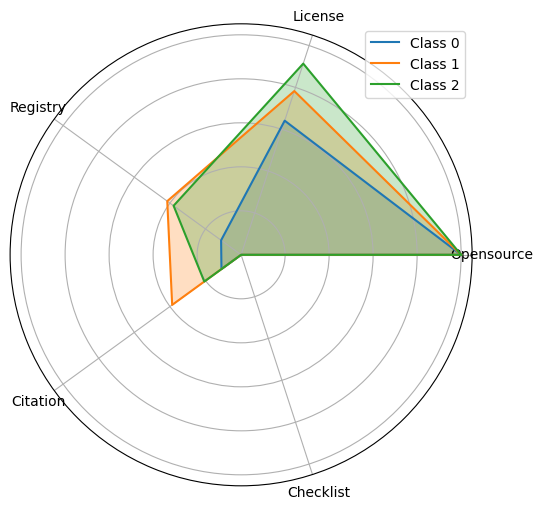

In [16]:
# Function to plot FAIR
plot_radar_chart(df, './results/plot_fairness.png')

### Software documentation

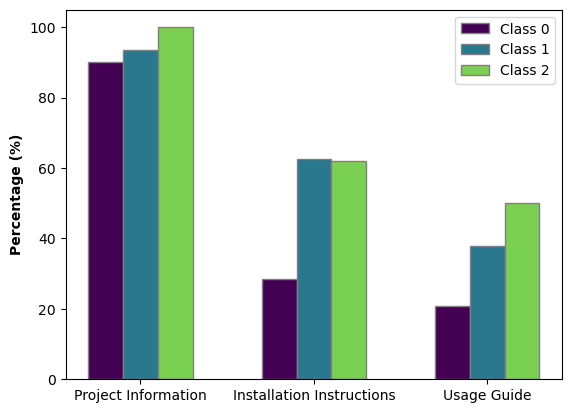

In [11]:
### Use this program to plot documentation 

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Filter the DataFrame according to 'dlr_soft_class' values
df = df[df['dlr_soft_class'].isin([0, 1, 2])]

# Calculate the total count for each 'dlr_soft_class'
total_counts = df['dlr_soft_class'].value_counts()

# Calculate the percentage of True values for each column and 'dlr_soft_class'
features = ['readme_content', 'quick_start_guide', 'help_commands']
feature_labels = ['Project Information', 'Installation Instructions', 'Usage Guide']
percentages = [[(df[(df['dlr_soft_class'] == dlr_class) & (df[feature])].shape[0] / total_counts[dlr_class]) * 100 for feature in features] for dlr_class in [0, 1, 2]]

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r = np.arange(len(features))

# Create the grouped bar chart
for i in range(3):
    plt.bar(r + i*bar_width, percentages[i], color=plt.cm.viridis(i/2.5), width=bar_width, edgecolor='grey', label=f'Class {i}')

# Adding labels
plt.ylabel('Percentage (%)', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(features))], feature_labels)

# Adding the legend
plt.legend()

# Save the plot
if not os.path.exists('results'):
    os.makedirs('results')
plt.savefig('results/plot_documentation.png')

# Show the plot
plt.show()

### Software developement practices 

### 1. Testing 

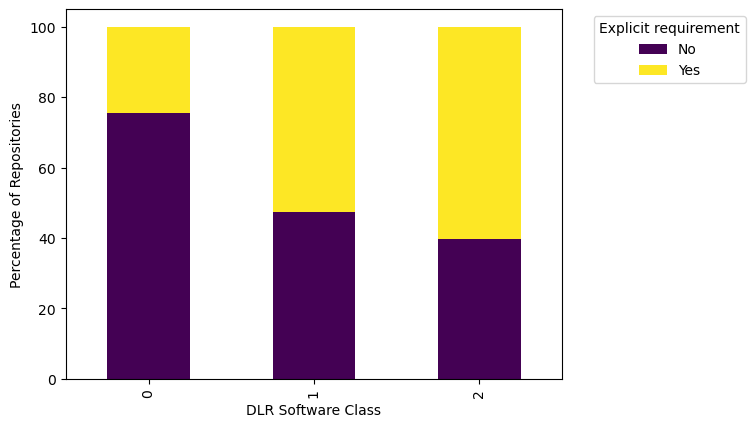

In [12]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Calculate percentages of 'test_folder' presence for each 'dlr_soft_class'
test_folder_percentages = df.groupby('dlr_soft_class')['test_folder'].value_counts(normalize=True).unstack() * 100

# Plot the stacked bar chart
test_folder_percentages.plot(kind='bar', stacked=True, cmap='viridis')

# Set labels and title
plt.xlabel('DLR Software Class')
plt.ylabel('Percentage of Repositories')

# Move legend outside the plot
plt.legend(title='Explicit requirement', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
if not os.path.exists('results'):
    os.makedirs('results')
plt.savefig('results/plot_test.png', bbox_inches='tight')  # Use bbox_inches='tight' to prevent cutting off the legend

# Show the plot
plt.show()

### 2. Continuous integration

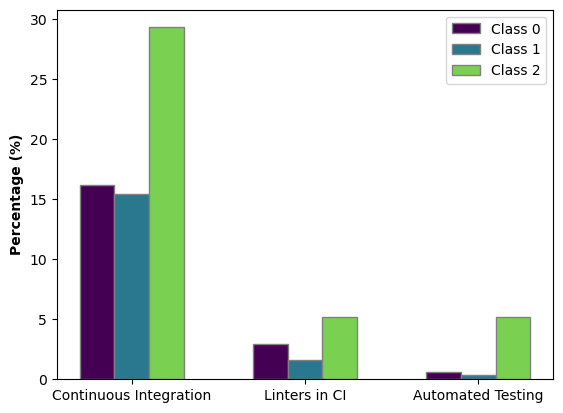

In [13]:
# Use this plot for continious integration 

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filter the DataFrame according to 'language' and 'dlr_soft_class' values
df = df[df['language'].isin(['C++', 'Python', 'R']) & df['dlr_soft_class'].isin([0, 1, 2])]

# Calculate the total count for each 'dlr_soft_class'
total_counts = df['dlr_soft_class'].value_counts()

# Calculate the percentage of True values for each column and 'dlr_soft_class'
features = ['continuous_integration', 'add_test_rule', 'add_lint_rule']
percentages = [[(df[(df['dlr_soft_class'] == dlr_class) & (df[feature])].shape[0] / total_counts[dlr_class]) * 100 for feature in features] for dlr_class in [0, 1, 2]]

# Bar width
bar_width = 0.2

# Positions of the bars on the x-axis
r = np.arange(len(features))

# Create the grouped bar chart
for i in range(3):
    plt.bar(r + i*bar_width, percentages[i], color=plt.cm.viridis(i/2.5), width=bar_width, edgecolor='grey', label=f'Class {i}')

# Adding labels
plt.ylabel('Percentage (%)', fontweight='bold')
updated_labels = ['Continuous Integration', 'Linters in CI', 'Automated Testing']
plt.xticks([r + bar_width for r in range(len(features))], updated_labels)

# Adding the legend
plt.legend()

# Save the plot
if not os.path.exists('results'):
    os.makedirs('results')
plt.savefig('results/plot_ci.png')

# Show the 

### 3. Making dependency requirement explicit

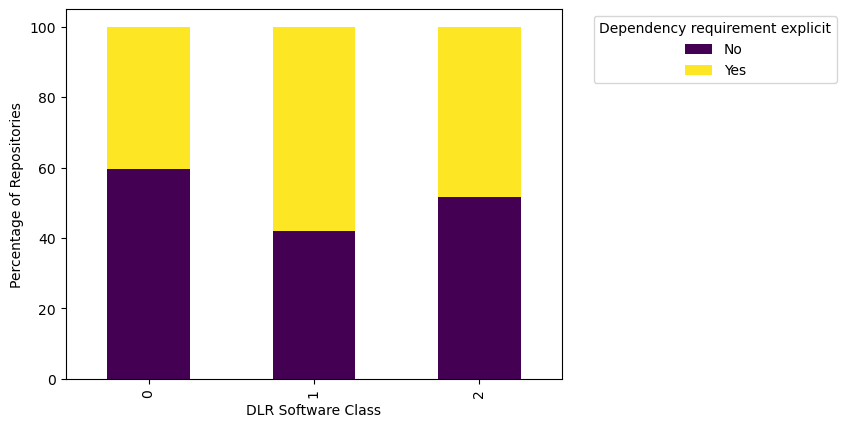

In [14]:
# Assuming df is your DataFrame
test_folder_percentages = df.groupby('dlr_soft_class')['requirements_explicit'].value_counts(normalize=True).unstack() * 100

test_folder_percentages.plot(kind='bar', stacked=True,  cmap='viridis')

plt.xlabel('DLR Software Class')
plt.ylabel('Percentage of Repositories')

# Move the legend outside of the plot
plt.legend(title='Dependency requirement explicit', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
if not os.path.exists('results'):
    os.makedirs('results')
plt.savefig('results/plot_requirement.png', bbox_inches='tight')

# Show the plot
plt.show()

### 4. Comment at the start of program file

<Figure size 1000x600 with 0 Axes>

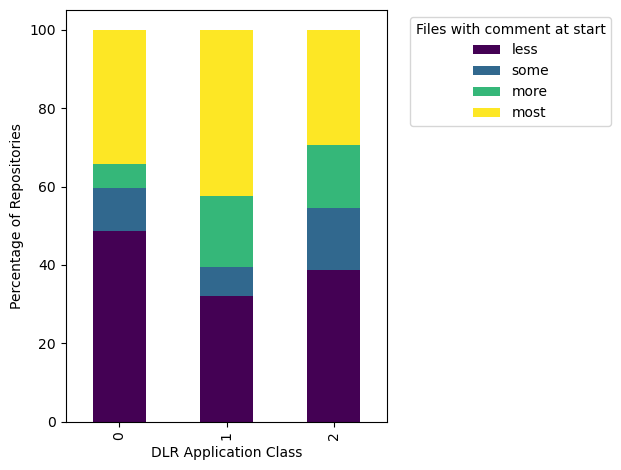

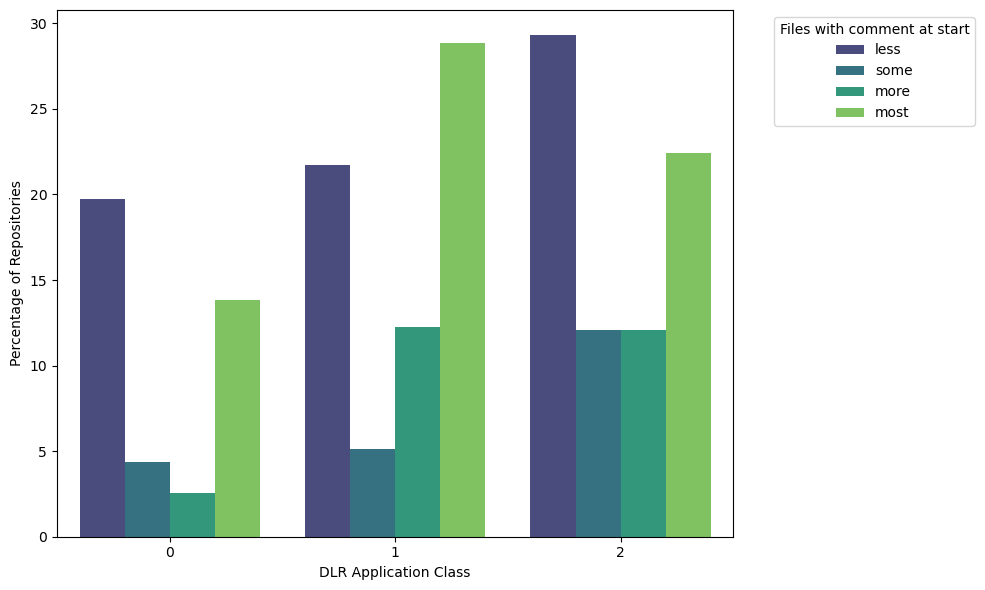

In [15]:
# Step 2: Filter Data by Language
df = df[df['language'].isin(['Python', 'C++', 'R'])]

# Replace 'none' with 'less' and ensure comment_at_start is a categorical type with the correct order
df['comment_category'] = df['comment_category'].replace('none', 'less')
comment_order = ['less', 'some', 'more', 'most']
df['comment_category'] = pd.Categorical(df['comment_category'], categories=comment_order, ordered=True)

# Step 3: Prepare Data for Visualization
# Create a pivot table for the stacked bar plot with percentages
pivot_table = df.pivot_table(index='dlr_soft_class', columns='comment_category', aggfunc='size', fill_value=0)

# Calculate the percentage
pivot_table = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Count the occurrences and calculate percentages for the grouped bar plot
counts = df.groupby(['dlr_soft_class', 'comment_category']).size().reset_index(name='counts')
total_counts = df.groupby('dlr_soft_class').size().reset_index(name='total_counts')
merged_counts = pd.merge(counts, total_counts, on='dlr_soft_class')
merged_counts['percentage'] = (merged_counts['counts'] / merged_counts['total_counts']) * 100

# Ensure the order of comment_category for plotting
merged_counts['comment_category'] = pd.Categorical(merged_counts['comment_category'], categories=comment_order, ordered=True)

# Step 4: Create Stacked Bar Plot
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel('DLR Application Class')
plt.ylabel('Percentage of Repositories')
plt.legend(title='Files with comment at start', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('plot_comment_at_start.png')  # Save the stacked bar plot
plt.show()

# Step 5: Create Grouped Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='dlr_soft_class', y='percentage', hue='comment_category', data=merged_counts, palette='viridis', order=[0, 1, 2])
plt.xlabel('DLR Application Class')
plt.ylabel('Percentage of Repositories')
plt.legend(title='Files with comment at start', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('grouped_bar_plot_comment_at_start.png')  # Save the grouped bar plot
plt.show()